In [2]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

/Users/biceneutron/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [146]:
### Preprocessing Start

In [3]:
from keras.datasets import mnist
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

In [4]:
x_train_image.shape

(60000, 28, 28)

In [148]:
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [149]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [150]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)


In [151]:
### End of Preprocessing

In [152]:
### Start Building Model

In [153]:
from keras.models import Sequential
from keras.layers import Dense

In [154]:
model = Sequential()

# input_layer: 784
# hidden_layer: 256
model.add(Dense(units=256,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))

In [155]:
# output_layer: 10
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

In [156]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_30 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [157]:
### End of Building Model

In [158]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam', metrics=['accuracy'])


# Start training!
train_history = model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,
                         validation_split=0.2,
                         epochs=10,
                         batch_size=200,
                         verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.4386 - acc: 0.8829 - val_loss: 0.2182 - val_acc: 0.9406
Epoch 2/10
 - 3s - loss: 0.1908 - acc: 0.9457 - val_loss: 0.1553 - val_acc: 0.9561
Epoch 3/10
 - 3s - loss: 0.1353 - acc: 0.9619 - val_loss: 0.1259 - val_acc: 0.9647
Epoch 4/10
 - 2s - loss: 0.1027 - acc: 0.9702 - val_loss: 0.1119 - val_acc: 0.9678
Epoch 5/10
 - 2s - loss: 0.0811 - acc: 0.9775 - val_loss: 0.0976 - val_acc: 0.9716
Epoch 6/10
 - 2s - loss: 0.0659 - acc: 0.9816 - val_loss: 0.0931 - val_acc: 0.9723
Epoch 7/10
 - 2s - loss: 0.0545 - acc: 0.9850 - val_loss: 0.0908 - val_acc: 0.9740
Epoch 8/10
 - 2s - loss: 0.0457 - acc: 0.9876 - val_loss: 0.0823 - val_acc: 0.9761
Epoch 9/10
 - 2s - loss: 0.0381 - acc: 0.9901 - val_loss: 0.0812 - val_acc: 0.9765
Epoch 10/10
 - 2s - loss: 0.0317 - acc: 0.9918 - val_loss: 0.0805 - val_acc: 0.9760


In [159]:
# Use test dats to score the model
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=', scores[1])

10000/10000 [==============================] - 1s 81us/step

accuracy= 0.9761


In [160]:
# Start predicting!
prediction=model.predict_classes(x_Test)

In [161]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

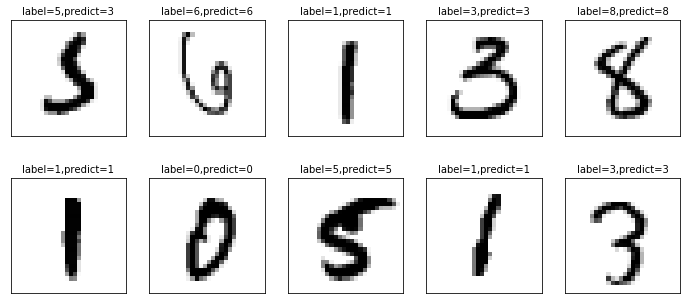

In [162]:
# print out the prediction

plot_images_labels_prediction(x_test_image, y_test_label, prediction, idx=340)

In [163]:
# confusion matrix

import pandas as pd
pd.crosstab(y_test_label, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,1,1,0,2,1,3,0
1,0,1124,4,0,0,1,2,0,4,0
2,6,0,1007,1,2,0,2,4,10,0
3,0,0,3,994,0,0,0,3,6,4
4,1,0,5,1,961,0,3,0,3,8
5,3,0,0,16,1,852,7,1,9,3
6,6,3,2,1,3,3,938,0,2,0
7,0,5,13,7,1,0,0,987,6,9
8,5,0,3,5,1,1,1,2,955,1


In [164]:
df = pd.DataFrame({'label': y_test_label, 'predict': prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [165]:
df[(df.label == 5) & (df.predict == 3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2526,5,3
2597,5,3
2810,5,3
3117,5,3
3902,5,3
4271,5,3


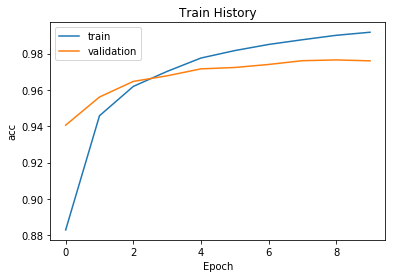

In [166]:
show_train_history(train_history, 'acc', 'val_acc')

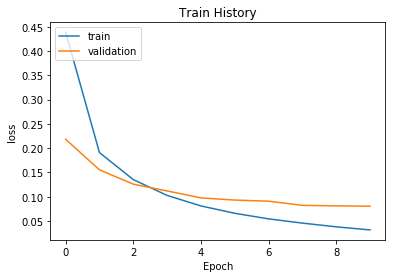

In [167]:
show_train_history(train_history, 'loss', 'val_loss')

In [168]:
### Start Building Model

In [169]:
model = Sequential()

# input_layer: 784
# hidden_layer: 1000
model.add(Dense(units=1000,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))

In [170]:
# output_layer: 10
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

In [171]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_32 (Dense)             (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [172]:
### End of Building Model

In [173]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam', metrics=['accuracy'])


# Start training!
train_history = model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,
                         validation_split=0.2,
                         epochs=10,
                         batch_size=200,
                         verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 8s - loss: 0.2904 - acc: 0.9163 - val_loss: 0.1535 - val_acc: 0.9560
Epoch 2/10
 - 8s - loss: 0.1148 - acc: 0.9671 - val_loss: 0.1208 - val_acc: 0.9641
Epoch 3/10
 - 7s - loss: 0.0735 - acc: 0.9793 - val_loss: 0.0917 - val_acc: 0.9735
Epoch 4/10
 - 7s - loss: 0.0518 - acc: 0.9856 - val_loss: 0.0818 - val_acc: 0.9743
Epoch 5/10
 - 9s - loss: 0.0358 - acc: 0.9907 - val_loss: 0.0825 - val_acc: 0.9753
Epoch 6/10
 - 8s - loss: 0.0244 - acc: 0.9942 - val_loss: 0.0746 - val_acc: 0.9779
Epoch 7/10
 - 8s - loss: 0.0185 - acc: 0.9955 - val_loss: 0.0744 - val_acc: 0.9771
Epoch 8/10
 - 7s - loss: 0.0135 - acc: 0.9969 - val_loss: 0.0755 - val_acc: 0.9781
Epoch 9/10
 - 7s - loss: 0.0099 - acc: 0.9980 - val_loss: 0.0721 - val_acc: 0.9796
Epoch 10/10
 - 7s - loss: 0.0069 - acc: 0.9989 - val_loss: 0.0824 - val_acc: 0.9766


In [174]:
# Use test dats to score the model
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=', scores[1])

10000/10000 [==============================] - 1s 142us/step

accuracy= 0.9787


In [175]:
# Start predicting!
prediction=model.predict_classes(x_Test)

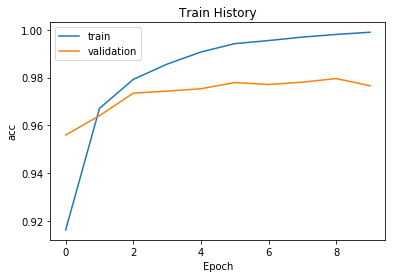

In [176]:
show_train_history(train_history, 'acc', 'val_acc')

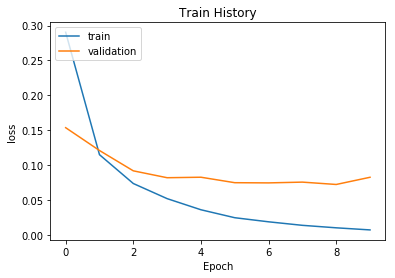

In [177]:
show_train_history(train_history, 'loss', 'val_loss')

In [178]:
### Start Building Model

In [179]:
from keras.layers import Dropout
model = Sequential()

# input_layer: 784
# hidden_layer: 1000
model.add(Dense(units=1000,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))

# dropout 0.5
model.add(Dropout(0.5))

# output_layer: 10
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [180]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam', metrics=['accuracy'])


# Start training!
train_history = model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,
                         validation_split=0.2,
                         epochs=10,
                         batch_size=200,
                         verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 9s - loss: 0.3529 - acc: 0.8943 - val_loss: 0.1623 - val_acc: 0.9538
Epoch 2/10
 - 8s - loss: 0.1595 - acc: 0.9537 - val_loss: 0.1180 - val_acc: 0.9651
Epoch 3/10
 - 8s - loss: 0.1152 - acc: 0.9662 - val_loss: 0.0964 - val_acc: 0.9699
Epoch 4/10
 - 7s - loss: 0.0909 - acc: 0.9731 - val_loss: 0.0875 - val_acc: 0.9722
Epoch 5/10
 - 7s - loss: 0.0741 - acc: 0.9774 - val_loss: 0.0785 - val_acc: 0.9768
Epoch 6/10
 - 7s - loss: 0.0646 - acc: 0.9799 - val_loss: 0.0765 - val_acc: 0.9779
Epoch 7/10
 - 7s - loss: 0.0543 - acc: 0.9836 - val_loss: 0.0749 - val_acc: 0.9792
Epoch 8/10
 - 8s - loss: 0.0460 - acc: 0.9855 - val_loss: 0.0704 - val_acc: 0.9791
Epoch 9/10
 - 7s - loss: 0.0418 - acc: 0.9869 - val_loss: 0.0680 - val_acc: 0.9803
Epoch 10/10
 - 8s - loss: 0.0373 - acc: 0.9886 - val_loss: 0.0704 - val_acc: 0.9809


In [181]:
# Use test dats to score the model
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=', scores[1])

10000/10000 [==============================] - 2s 169us/step

accuracy= 0.9811


In [182]:
# Start predicting!
prediction=model.predict_classes(x_Test)

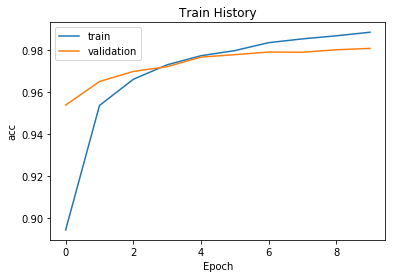

In [183]:
show_train_history(train_history, 'acc', 'val_acc')

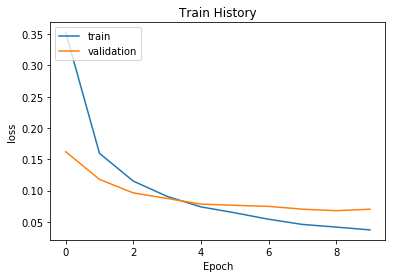

In [184]:
show_train_history(train_history, 'loss', 'val_loss')

In [185]:
### Start Building Model

In [186]:
model = Sequential()

# input_layer: 784
# hidden_layer: 1000
model.add(Dense(units=1000,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))

# dropout 0.5
model.add(Dropout(0.5))

# hidden_layer: 1000
model.add(Dense(units=1000,
                kernel_initializer='normal',
                activation='relu'))

# dropout 0.5
model.add(Dropout(0.5))

# output_layer: 10
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [187]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam', metrics=['accuracy'])


# Start training!
train_history = model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,
                         validation_split=0.2,
                         epochs=10,
                         batch_size=200,
                         verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 19s - loss: 0.3748 - acc: 0.8825 - val_loss: 0.1342 - val_acc: 0.9596
Epoch 2/10
 - 17s - loss: 0.1611 - acc: 0.9498 - val_loss: 0.1030 - val_acc: 0.9689
Epoch 3/10
 - 16s - loss: 0.1200 - acc: 0.9634 - val_loss: 0.0920 - val_acc: 0.9723
Epoch 4/10
 - 16s - loss: 0.0972 - acc: 0.9698 - val_loss: 0.0802 - val_acc: 0.9763
Epoch 5/10
 - 17s - loss: 0.0817 - acc: 0.9748 - val_loss: 0.0812 - val_acc: 0.9760
Epoch 6/10
 - 16s - loss: 0.0762 - acc: 0.9758 - val_loss: 0.0755 - val_acc: 0.9759
Epoch 7/10
 - 17s - loss: 0.0671 - acc: 0.9788 - val_loss: 0.0743 - val_acc: 0.9779
Epoch 8/10
 - 18s - loss: 0.0599 - acc: 0.9811 - val_loss: 0.0707 - val_acc: 0.9796
Epoch 9/10
 - 16s - loss: 0.0549 - acc: 0.9815 - val_loss: 0.0793 - val_acc: 0.9791
Epoch 10/10
 - 16s - loss: 0.0519 - acc: 0.9830 - val_loss: 0.0735 - val_acc: 0.9791


In [188]:
# Use test dats to score the model
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=', scores[1])

10000/10000 [==============================] - 2s 202us/step

accuracy= 0.9803


In [189]:
# Start predicting!
prediction=model.predict_classes(x_Test)

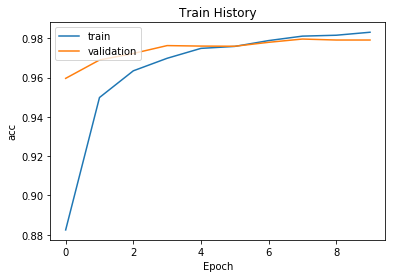

In [190]:
show_train_history(train_history, 'acc', 'val_acc')

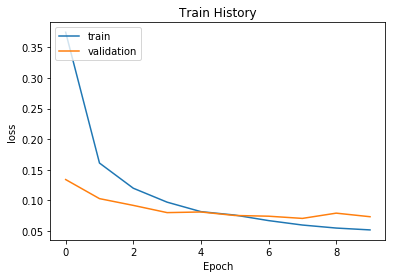

In [191]:
show_train_history(train_history, 'loss', 'val_loss')

In [192]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
#     if num>25: num=25
    for i in range(0,num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap="binary")
        title = "label="+str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
            
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx+=1
        
        
    plt.show()

In [193]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    
    plt.show()